In [1]:
pip install apimoex

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import apimoex
from datetime import datetime




In [7]:
tickers = [
    'GAZP', 
    'SBER', 
    'LKOH', 
    'NLMK', 
    'POSI', 
    'TATN', 
    'ROSN', 
    'BSPB', 
    'MTSS', 
    'MGNT'
    ]



closing_prices = pd.DataFrame(columns=tickers)

for ticker in tickers:
    with requests.Session() as session:
        data = apimoex.get_board_candles(session, ticker, 24, '2022-01-01', '2024-12-20', ('begin', 'open', 'high', 'low', 'close', 'value'))
        data = pd.DataFrame(data)
        closing_prices[ticker] = data['close'] 

print(closing_prices)  

       GAZP    SBER    LKOH    NLMK    POSI   TATN    ROSN    BSPB    MTSS  \
0    353.73  305.47  6683.0  218.68   849.4  515.4  610.95   84.18  304.65   
1    352.55  304.24  6728.0  218.40   844.0  515.4  613.50   87.10  304.95   
2    335.00  287.01  6522.0  213.62   838.0  492.6  590.30   86.11  298.30   
3    346.13  293.92  6699.0  213.82   830.0  496.4  601.60   85.05  299.20   
4    344.00  291.69  6775.0  212.32   784.0  499.8  602.00   83.65  295.85   
..      ...     ...     ...     ...     ...    ...     ...     ...     ...   
628  134.07  294.39  6973.0  169.06  3029.2  663.6  530.55  387.09  239.95   
629  136.73  295.69  6939.5  170.92  2980.4  667.5  532.25  382.07  239.85   
630  135.10  296.37  6902.5  172.98  2862.2  657.6  532.45  365.35  237.80   
631  135.00  293.30  6890.0  169.90     NaN  650.3  521.40     NaN  230.80   
632  130.99  286.58  6727.5  163.02     NaN  646.7  503.20     NaN  225.10   

       MGNT  
0    5509.5  
1    5565.0  
2    5399.0  
3    55

In [65]:
# Вычисляем доходность
stock_ret = closing_prices.pct_change()
print(stock_ret.round(4)*100)

     GAZP  SBER  LKOH  NLMK  POSI  TATN  ROSN  BSPB  MTSS  MGNT
0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
1   -0.33 -0.40  0.67 -0.13 -0.64  0.00  0.42  3.47  0.10  1.01
2   -4.98 -5.66 -3.06 -2.19 -0.71 -4.42 -3.78 -1.14 -2.18 -2.98
3    3.32  2.41  2.71  0.09 -0.95  0.77  1.91 -1.23  0.30  2.52
4   -0.62 -0.76  1.13 -0.70 -5.54  0.68  0.07 -1.65 -1.12 -1.12
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
627  0.56  1.66  1.37  0.05 -1.18  0.08  1.47  2.69  0.52 -0.55
628  1.87 -0.11 -0.50 -0.58  1.21  0.06 -0.24  3.93  0.19 -0.66
629  1.98  0.44 -0.48  1.10 -1.61  0.59  0.32 -1.30 -0.04 -1.75
630 -1.19  0.23 -0.53  1.21  0.00 -1.48  0.04  0.00 -0.85 -0.53
631 -0.07 -1.04 -0.18 -1.78  0.00 -1.11 -2.08  0.00 -2.94  0.50

[632 rows x 10 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_2424\1471839084.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_ret = closing_prices.pct_change()


In [66]:
# Средняя и ковариация для каждой катировки
avg_returns = stock_ret.mean()
covar_matrix = stock_ret.cov()
print(avg_returns)
print(covar_matrix)

GAZP   -0.001039
SBER    0.000352
LKOH    0.000316
NLMK   -0.000100
POSI    0.002523
TATN    0.000703
ROSN    0.000135
BSPB    0.003001
MTSS   -0.000125
MGNT    0.000436
dtype: float64
          GAZP      SBER      LKOH      NLMK      POSI      TATN      ROSN  \
GAZP  0.000921  0.000492  0.000389  0.000340  0.000218  0.000469  0.000482   
SBER  0.000492  0.000752  0.000392  0.000392  0.000239  0.000453  0.000520   
LKOH  0.000389  0.000392  0.000521  0.000297  0.000208  0.000380  0.000422   
NLMK  0.000340  0.000392  0.000297  0.000585  0.000110  0.000357  0.000379   
POSI  0.000218  0.000239  0.000208  0.000110  0.001159  0.000331  0.000378   
TATN  0.000469  0.000453  0.000380  0.000357  0.000331  0.000638  0.000533   
ROSN  0.000482  0.000520  0.000422  0.000379  0.000378  0.000533  0.000704   
BSPB  0.000217  0.000237  0.000146  0.000106  0.000220  0.000171  0.000241   
MTSS  0.000292  0.000354  0.000271  0.000297  0.000022  0.000296  0.000322   
MGNT  0.000384  0.000424  0.000341 

In [67]:
num_tickers = len(tickers)


num_trials = 1000000
sim_results = np.zeros((4 + num_tickers - 1, num_trials))

for i in range(num_trials):
    random_weights = np.random.random(num_tickers)
    random_weights /= np.sum(random_weights)

    portfolio_return = np.sum(avg_returns * random_weights)
    portfolio_std_dev = np.sqrt(np.dot(random_weights.T, np.dot(covar_matrix, random_weights)))

    sim_results[0, i] = portfolio_return
    sim_results[1, i] = portfolio_std_dev
    sim_results[2, i] = portfolio_return / portfolio_std_dev

    for j in range(num_tickers):
        sim_results[j + 3, i] = random_weights[j]

# Create DataFrame with the specified column names
sim_dataframe = pd.DataFrame(
    sim_results.T,
    columns=['ret', 'stdev', 'sharpe'] + tickers
)

In [68]:
sim_dataframe

,ret,stdev,sharpe,GAZP,SBER,LKOH,NLMK,POSI,TATN,ROSN,BSPB,MTSS,MGNT
0,0.000577,0.018965,0.030414,0.164852,0.046618,0.096562,0.064018,0.021665,0.022489,0.044648,0.191491,0.169751,0.177904
1,0.000469,0.019610,0.023930,0.112016,0.001243,0.104150,0.124124,0.140526,0.149201,0.147303,0.013466,0.081455,0.126516
2,0.000566,0.019480,0.029039,0.067771,0.030000,0.053729,0.034669,0.001078,0.150864,0.129391,0.134745,0.164099,0.233656
3,0.000477,0.019484,0.024475,0.076302,0.153315,0.085372,0.135942,0.067401,0.067691,0.099985,0.062066,0.068451,0.183475
4,0.000729,0.019683,0.037023,0.166787,0.042355,0.061590,0.157163,0.073815,0.104095,0.166570,0.199505,0.017006,0.011114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.000610,0.019199,0.031792,0.027135,0.164705,0.138094,0.164384,0.012463,0.007416,0.139614,0.163419,0.128557,0.054213
999996,0.000725,0.019134,0.037872,0.002228,0.053889,0.021951,0.165347,0.004270,0.105450,0.151922,0.191434,0.168690,0.134818
999997,0.000653,0.019405,0.033671,0.073383,0.112588,0.150344,0.104881,0.136866,0.091245,0.110806,0.056259,0.020636,0.142992
999998,0.000332,0.019961,0.016621,0.153732,0.106940,0.053549,0.090067,0.091093,0.156839,0.118763,0.022608,0.121283,0.085126


In [69]:
max_sharpe_ratio = sim_dataframe.iloc[sim_dataframe['sharpe'].idxmax()]

min_risk = sim_dataframe.iloc[sim_dataframe['stdev'].idxmin()]

print ("Портфель с максимальным коэффициентом шарпа :\n", max_sharpe_ratio)
print ("Портфель с минимальным риком:\n", min_risk)

Портфель с максимальным коэффициентом шарпа :
 ret       0.001975
stdev     0.021682
sharpe    0.091090
GAZP      0.056113
SBER      0.007250
LKOH      0.018412
NLMK      0.095631
POSI      0.339666
TATN      0.056762
ROSN      0.023257
BSPB      0.374601
MTSS      0.003676
MGNT      0.024633
Name: 469318, dtype: float64
Портфель с минимальным риком:
 ret       0.000908
stdev     0.017462
sharpe    0.052022
GAZP      0.012987
SBER      0.000307
LKOH      0.132965
NLMK      0.224309
POSI      0.177099
TATN      0.002679
ROSN      0.001628
BSPB      0.143994
MTSS      0.198392
MGNT      0.105640
Name: 34487, dtype: float64


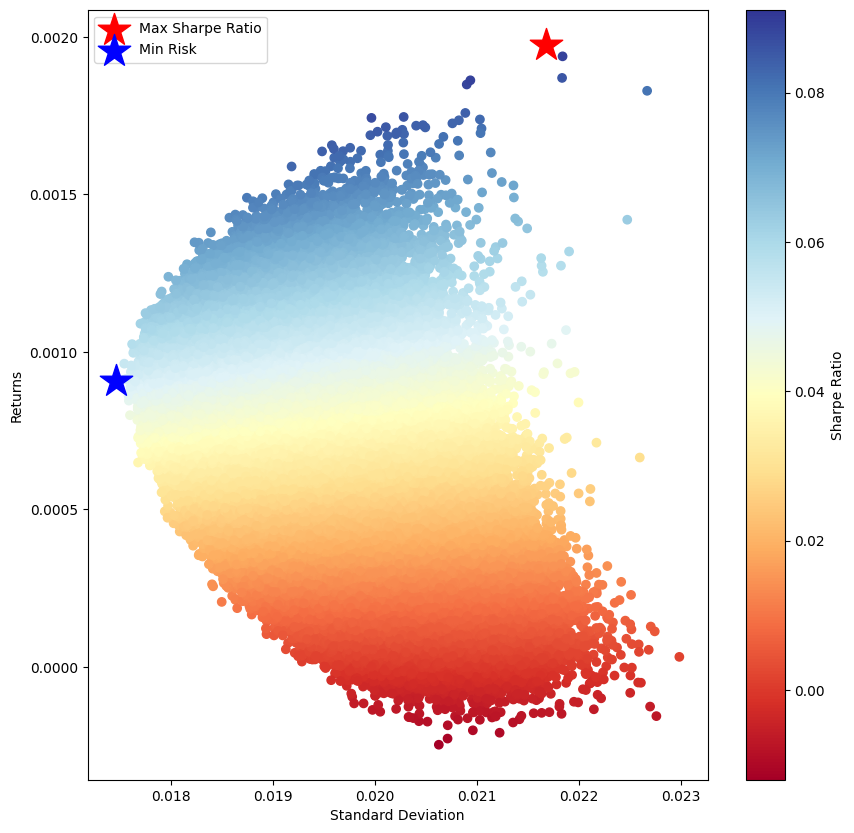

In [70]:
max_sharpe_ratio_idx = sim_dataframe['sharpe'].idxmax()
min_risk_idx = sim_dataframe['stdev'].idxmin()

max_sharpe_ratio = sim_dataframe.iloc[max_sharpe_ratio_idx][['ret', 'stdev']]
min_risk = sim_dataframe.iloc[min_risk_idx][['ret', 'stdev']]

fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(sim_dataframe['stdev'], sim_dataframe['ret'], c=sim_dataframe['sharpe'], cmap='RdYlBu', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

plt.scatter(max_sharpe_ratio['stdev'], max_sharpe_ratio['ret'], marker='*', color='r', s=600, label='Max Sharpe Ratio')
plt.scatter(min_risk['stdev'], min_risk['ret'], marker='*', color='b', s=600, label='Min Risk')

plt.legend()
plt.show()


In [78]:
max_sharpe_ratio = sim_dataframe.iloc[sim_dataframe['sharpe'].idxmax()]
max_sharpe_ratio

ret       0.001975
stdev     0.021682
sharpe    0.091090
GAZP      0.056113
SBER      0.007250
LKOH      0.018412
NLMK      0.095631
POSI      0.339666
TATN      0.056762
ROSN      0.023257
BSPB      0.374601
MTSS      0.003676
MGNT      0.024633
Name: 469318, dtype: float64

In [80]:
min_risk = sim_dataframe.iloc[sim_dataframe['stdev'].idxmin()]
min_risk

ret       0.000908
stdev     0.017462
sharpe    0.052022
GAZP      0.012987
SBER      0.000307
LKOH      0.132965
NLMK      0.224309
POSI      0.177099
TATN      0.002679
ROSN      0.001628
BSPB      0.143994
MTSS      0.198392
MGNT      0.105640
Name: 34487, dtype: float64

In [79]:
import math
prices = closing_prices.iloc[-3]
print(prices)

total_investment = 100000
weights = max_sharpe_ratio[3:]

investments_max_sharpe = {}
sum_bucks = {}
total_spent = 0

for ticker, weight in weights.items():
    price = prices[ticker]
    if pd.notna(price) and price > 0:  # проверяем, что цена валидная и больше нуля
        investment = math.floor((total_investment * weight) / price)
        investment_value = investment * price
        sum_bucks[ticker] = investment_value
        investments_max_sharpe[ticker] = investment
        total_spent += investment_value
    else:
        sum_bucks[ticker] = 0
        investments_max_sharpe[ticker] = 0

remaining_balance = total_investment - total_spent

print("Распределение средств для максимального коэффициента Шарпа:")
print(f"Тикер   количество акций   суммарная стоимость")
for ticker, investment in investments_max_sharpe.items():
    print(f"{ticker}: {investment}, {sum_bucks[ticker]:.2f} руб.")

print(f"Оставшийся баланс: {remaining_balance:.2f} рублей")

GAZP     136.73
SBER     295.69
LKOH    6939.50
NLMK     170.92
POSI    2980.40
TATN     667.50
ROSN     532.25
BSPB     382.07
MTSS     239.85
MGNT    5934.00
Name: 629, dtype: float64
Распределение средств для максимального коэффициента Шарпа:
Тикер   количество акций   суммарная стоимость
GAZP: 41, 5605.93 руб.
SBER: 2, 591.38 руб.
LKOH: 0, 0.00 руб.
NLMK: 55, 9400.60 руб.
POSI: 11, 32784.40 руб.
TATN: 8, 5340.00 руб.
ROSN: 4, 2129.00 руб.
BSPB: 98, 37442.86 руб.
MTSS: 1, 239.85 руб.
MGNT: 0, 0.00 руб.
Оставшийся баланс: 6465.98 рублей
